In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('ParisHousingClass.csv')
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


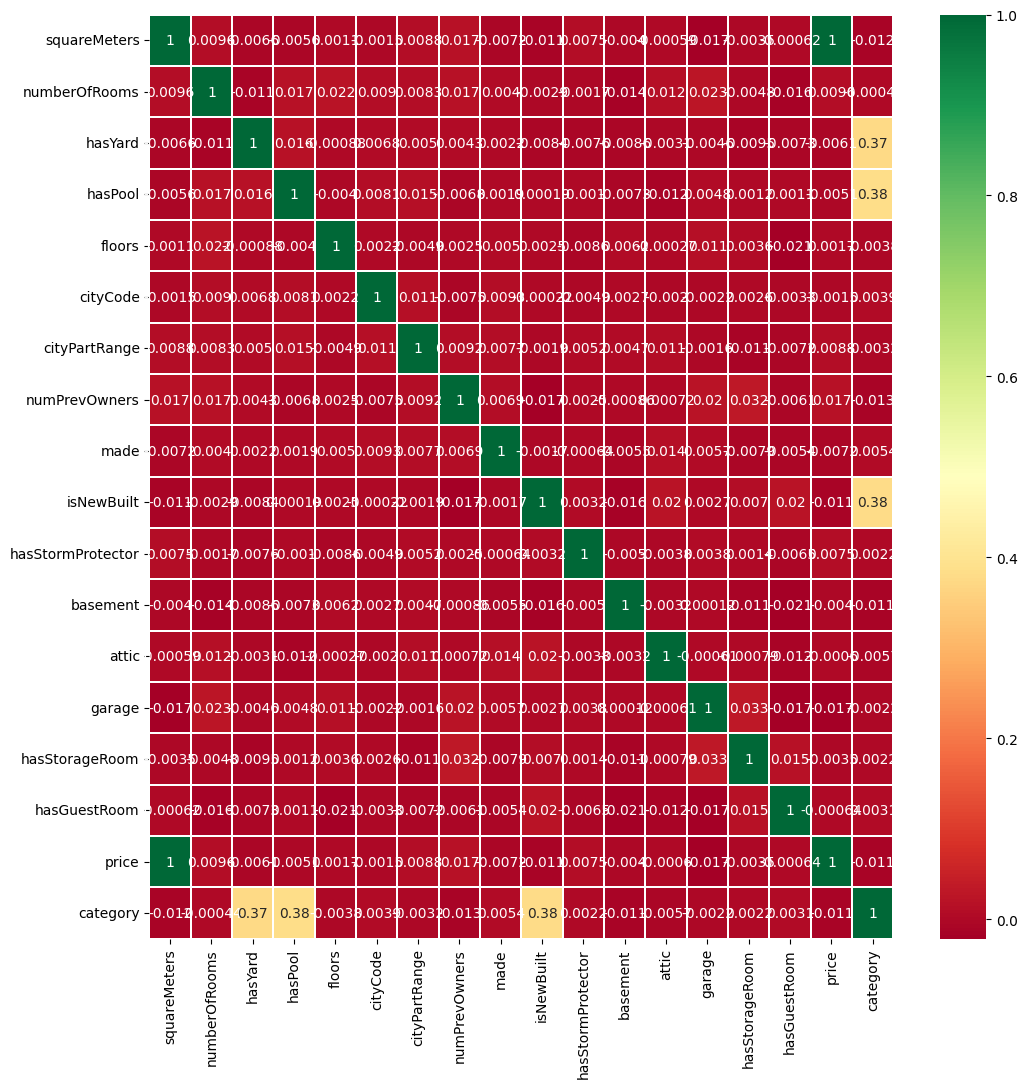

In [2]:
df = dataset
# преобразуем данные в числовые значения (для вывода корреляции)
df['category'] = pd.Categorical(df['category'], categories=['Basic', 'Luxury'], ordered=True).codes
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(12,12)

In [3]:
# по всем столбцам
dataset.mode(axis=0).iloc[0]

squareMeters          3802.0
numberOfRooms           54.0
hasYard                  1.0
hasPool                  0.0
floors                  97.0
cityCode             16401.0
cityPartRange            8.0
numPrevOwners            4.0
made                  1992.0
isNewBuilt               0.0
hasStormProtector        0.0
basement              1421.0
attic                 3127.0
garage                 253.0
hasStorageRoom           1.0
hasGuestRoom             2.0
price                10313.5
category                 0.0
Name: 0, dtype: float64

In [4]:
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


## Средневзвешенное значение (в качестве веса взята цена)

In [5]:
# Средневзвешенное значение

for column in dataset.columns:
    wmean = np.average(dataset[column], weights=dataset['price'])
    print(column, wmean)

squareMeters 66449.4079660499
numberOfRooms 50.51764425681469
hasYard 0.5069372782784569
hasPool 0.495339236408316
floors 50.303835807795366
cityCode 50199.75844592591
cityPartRange 5.524683691331369
numPrevOwners 5.549053939694342
made 2005.4498341787744
isNewBuilt 0.4960337622408427
hasStormProtector 0.5020596138723726
basement 5026.527715720988
attic 5027.010812461399
garage 550.5198082199913
hasStorageRoom 0.5019958838825492
hasGuestRoom 4.993421495679968
price 6651368.533000112
category 0.1243165979013192


## Дисперсия

In [6]:

for column in dataset.columns:
    variance = dataset[column].var()
    print(column, variance)

squareMeters 827964676.7996665
numberOfRooms 830.4019896389639
hasYard 0.24994930493049305
hasPool 0.25001476147614765
floors 834.5842167316732
cityCode 841387240.9252994
cityPartRange 8.24852284228423
numPrevOwners 8.160545164516451
made 86.64053180318032
isNewBuilt 0.2500241924192419
hasStormProtector 0.25002499249925
basement 8275572.873992191
attic 8377158.940781718
garage 68670.29153971399
hasStorageRoom 0.25001600160015996
hasGuestRoom 10.089579797979797
price 8279569508492.863
category 0.110508800880088


## Квантиль (процентиль)

In [7]:
for column in dataset.columns:
    percentile = np.percentile(df[column], [5, 95, 25, 50, 75])
    print(column, percentile)

squareMeters [ 4779.85 94695.35 25098.5  50105.5  74609.75]
numberOfRooms [ 5. 96. 25. 50. 75.]
hasYard [0. 1. 0. 1. 1.]
hasPool [0. 1. 0. 0. 1.]
floors [ 5. 96. 25. 50. 76.]
cityCode [ 4928.2  94887.2  24693.75 50693.   75683.25]
cityPartRange [ 1. 10.  3.  5.  8.]
numPrevOwners [ 1. 10.  3.  5.  8.]
made [1991.  2020.  1997.  2005.5 2014. ]
isNewBuilt [0. 1. 0. 0. 1.]
hasStormProtector [0. 1. 0. 0. 1.]
basement [ 479.9  9487.   2559.75 5092.5  7511.25]
attic [ 521.  9517.  2512.  5045.  7540.5]
garage [142.   956.   327.75 554.   777.25]
hasStorageRoom [0. 1. 0. 1. 1.]
hasGuestRoom [ 0. 10.  2.  5.  8.]
price [ 485214.06  9476493.725 2516401.95  5016180.3   7469092.45 ]
category [0. 1. 0. 0. 0.]


## Размах

In [8]:
for column in dataset.columns:
    range = max(df[column]) - min(df[column])
    print(column, range)

squareMeters 99910
numberOfRooms 99
hasYard 1
hasPool 1
floors 99
cityCode 99950
cityPartRange 9
numPrevOwners 9
made 31
isNewBuilt 1
hasStormProtector 1
basement 10000
attic 9999
garage 900
hasStorageRoom 1
hasGuestRoom 10
price 9996457.7
category 1


## Корреляция

Корреляция 0.9999993570640748


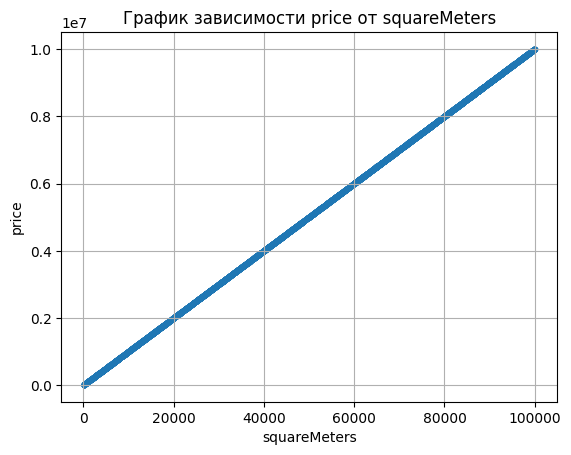

In [9]:
x = dataset['squareMeters'].values
y = dataset['price'].values

plt.xlabel('squareMeters')
plt.ylabel('price')
plt.title('График зависимости price от squareMeters')
plt.grid(True)
plt.scatter(x, y, marker='.')

correlation = df['squareMeters'].corr(df['price'])
print("Корреляция", correlation)

Корреляция 0.3739868408684486


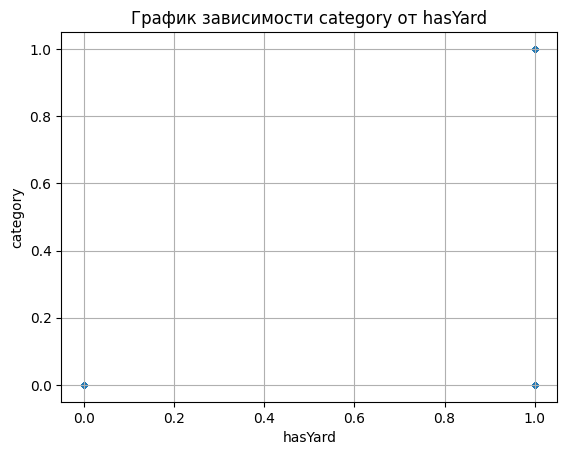

In [10]:
x = dataset['hasYard'].values
y = dataset['category'].values

plt.xlabel('hasYard')
plt.ylabel('category')
plt.title('График зависимости category от hasYard')
plt.grid(True)
plt.scatter(x, y, marker='.')

correlation = df['hasYard'].corr(df['category'])
print("Корреляция", correlation)

Корреляция 0.3829951996925737


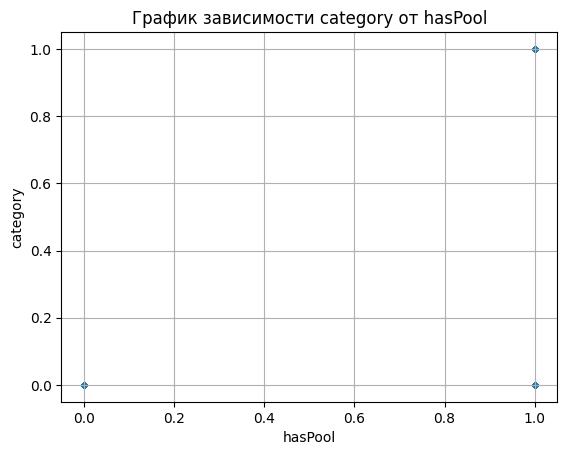

In [11]:
x = dataset['hasPool'].values
y = dataset['category'].values

plt.xlabel('hasPool')
plt.ylabel('category')
plt.title('График зависимости category от hasPool')
plt.grid(True)
plt.scatter(x, y, marker='.')

correlation = df['hasPool'].corr(df['category'])
print("Корреляция", correlation)

Корреляция 0.3812374350844048


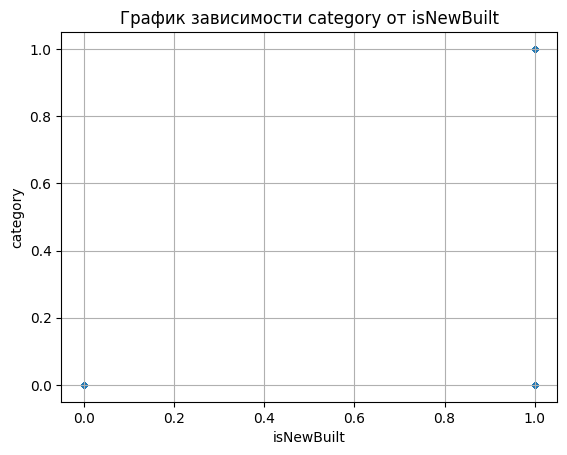

In [12]:
x = dataset['isNewBuilt'].values
y = dataset['category'].values

plt.xlabel('isNewBuilt')
plt.ylabel('category')
plt.title('График зависимости category от isNewBuilt')
plt.grid(True)
plt.scatter(x, y, marker='.')

correlation = df['isNewBuilt'].corr(df['category'])
print("Корреляция", correlation)

## Корреляция Пирсона

Коэффициент корреляции Пирсона: -0.017245902335792533


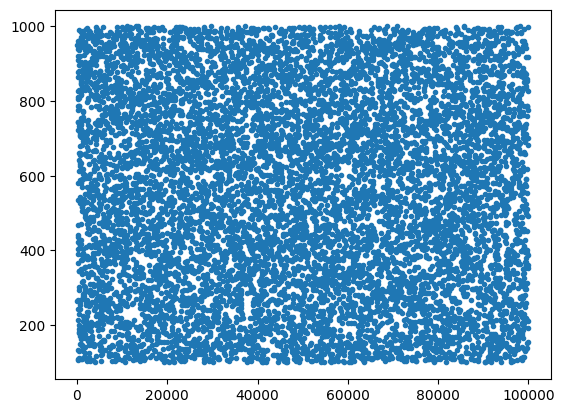

In [13]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['squareMeters'], df['garage'])
plt.scatter(df['squareMeters'], df['garage'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

## Корреляция Спирмана

In [14]:
import scipy.stats as sts

cor, p_value = sts.spearmanr(df['squareMeters'], df['price'])
print(cor)

0.9999991385469901


In [15]:
cor, p_value = sts.spearmanr(df['hasYard'], df['price'])
print(cor)

-0.00598663145864874


In [16]:
cor, p_value = sts.spearmanr(df['hasYard'], df['hasPool'])
print(cor)

0.01551402637351035


## Тау Кендала

In [17]:
cor, p_value = sts.kendalltau(df['squareMeters'], df['price'])
print(cor)

0.9992645325620133


In [18]:
cor, p_value = sts.kendalltau(df['squareMeters'], df['category'])
print(cor)

-0.00968597427156125


## Выбросы

In [19]:
for column in dataset.columns:
    print(column, df[column].isnull().sum())

squareMeters 0
numberOfRooms 0
hasYard 0
hasPool 0
floors 0
cityCode 0
cityPartRange 0
numPrevOwners 0
made 0
isNewBuilt 0
hasStormProtector 0
basement 0
attic 0
garage 0
hasStorageRoom 0
hasGuestRoom 0
price 0
category 0


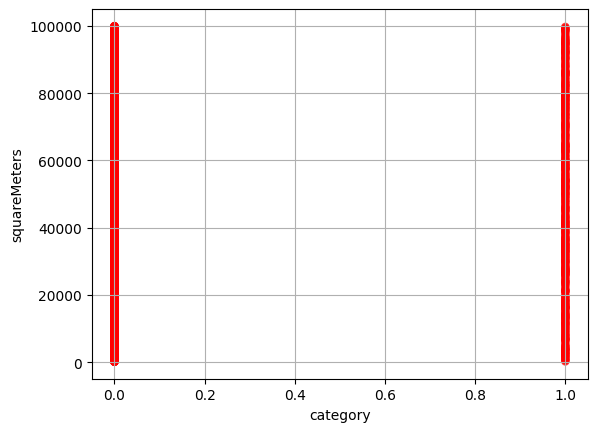

In [20]:
# просмотр нестандартных значений
smog = df['category']
fuel_cons = df['squareMeters']
fig, ax = plt.subplots()
ax.scatter(smog, fuel_cons, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('category')
plt.ylabel('squareMeters')
plt.show()

## Коэффициент островершинности, или куртосис

In [21]:
# статистическая мера, характеризующая остроту пика распределения случайной величины по сравнению с нормальным распределением.
for column in dataset.columns:
    print(column, sts.kurtosis(df[column], axis=0, fisher=True, bias=True))

squareMeters -1.1850616328042742
numberOfRooms -1.1832270055801817
hasYard -1.9987885932344878
hasPool -1.9998361532888393
floors -1.2011606992790003
cityCode -1.2213962690162574
cityPartRange -1.2255112862237427
numPrevOwners -1.2122394612653546
made -1.2197637071250615
isNewBuilt -1.9999870399580095
hasStormProtector -1.9999998399999939
basement -1.182239648338564
attic -1.2051189247855547
garage -1.2105677184757608
hasStorageRoom -1.999855994815813
hasGuestRoom -1.233231945651699
price -1.1850410631048522
category 3.0499580308196297


## Коэффициент асимметрии

In [22]:
# это статистическая характеристика, показывающая степень и направление отклонения распределения от симметричного.

for column in dataset.columns:
    print(column, sts.skew(df[column], axis=0, bias=True))

squareMeters -0.0064171634594398005
numberOfRooms 0.018734531011366157
hasYard -0.03480526922051237
hasPool 0.012800262152053208
floors 0.01492838874746188
cityCode -0.022283508604477854
cityPartRange -0.0033386782056786762
numPrevOwners 0.002244524643213977
made -0.005156249471862117
isNewBuilt 0.0036000058320142343
hasStormProtector 0.00040000000799997185
basement -0.027211407689144193
attic -0.016823577954843582
garage -0.018871202530255912
hasStorageRoom -0.012000216005832112
hasGuestRoom 0.00796518312745372
price -0.006448191698178402
category 2.24721116738495
